# General Overview

## Business Understanding
Microsoft wants to know how to get into the movie businesss. In order for a company to succeed, it requires a sustainable business model. We are here to help substantiate hypotheses of potential business models with data. This particular data set helps us understand the relationship between the production budget of a movie and its gross revenue returns. 

## Data Understanding

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Cleaning

Luckily, we have no missing values. However, we need the data columns for production_budget, domestic_gross, and worldwide_gross to be integers, rather than strings, in order to properly analyze them. 

In [4]:
#cleaning the production budget column, domestic_gross column, worldwide_gross column to be floats
df['prod_budg_fixed'] = df['production_budget'].str.replace('$', '').str.replace(',','').astype(float)
df['dom_gross_fixed'] = df['domestic_gross'].str.replace('$', '').str.replace(',','').astype(float)
df['world_gross_fixed'] = df['worldwide_gross'].str.replace('$', '').str.replace(',','').astype(float)

In [5]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,prod_budg_fixed,dom_gross_fixed,world_gross_fixed
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000.0,620181382.0,1.316722e+09


In [6]:
df.describe()

,id,prod_budg_fixed,dom_gross_fixed,world_gross_fixed
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


## Data Analysis
With the cleaning out of the way, we have a column of floats for production budget called prod_budg_fixed, a column of floats for domestic gross called dom_gross_fixed, and a column of floats for worldwide gross called world_gross_fixed. We can now start exploring relationships between production budget and the gross revenue

In [7]:
#Checking the Pearson Correlation Coefficient
df.corr(method='pearson')

,id,prod_budg_fixed,dom_gross_fixed,world_gross_fixed
id,1.000000,-0.035278,0.008255,-0.009422
prod_budg_fixed,-0.035278,1.000000,0.685682,0.748306
dom_gross_fixed,0.008255,0.685682,1.000000,0.938853
world_gross_fixed,-0.009422,0.748306,0.938853,1.000000


From here, we can see that there is a relatively high correlation between production budget and worldwide gross (0.748306), and an extremely high correlation between the domestic gross and worldwide gross (0.938853), indicating that a movie doing well in domestic theaters will also do well internationally. Logical, but nice to know.

y=3.126943x+(-7285667.054592)
y2=1.119087x+(6523888.576660)


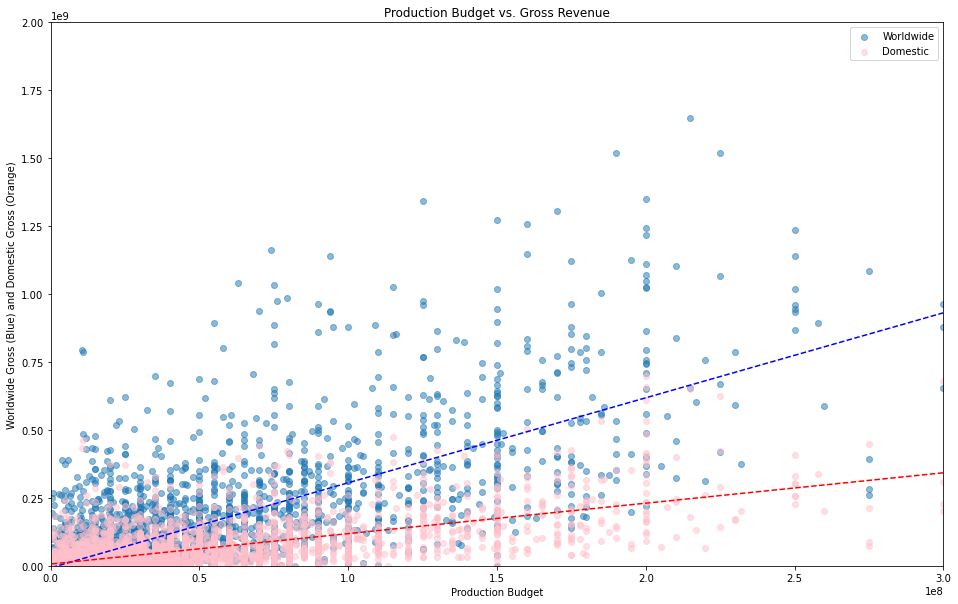

In [8]:
#scatterplot of production budget vs worldwide gross
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
import seaborn as sns
import numpy as np
import pylab as plb


#code for basic scatter plot
x = df['prod_budg_fixed']
y = df['world_gross_fixed']

fig, ax = plt.subplots(figsize=(16, 10))

#going for more of a 'heatmap' style plot for readability, so opacity is low
ax.scatter(x, y, alpha=0.5)
#domestic gross scatter plot
y2 = df['dom_gross_fixed']
ax.scatter(x, y2, alpha=0.5, c='pink')

ax.set_title('Production Budget vs. Gross Revenue')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Worldwide Gross (Blue) and Domestic Gross (Orange)')
ax.set_xlim(xmin=-5000, xmax=(3*10**8))
ax.set_ylim(ymin=-5000, ymax=(2*10**9))
plt.legend(['Worldwide', 'Domestic'])


#finding the trend line
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plb.plot(x, p(x), 'b--')
#Supposedly the equation for the line (need to look into this more to understand it)
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

#second trend line
z2 = np.polyfit(x,y2,1)
p2 = np.poly1d(z2)
plb.plot(x, p2(x), 'r--')
print("y2=%.6fx+(%.6f)"%(z2[0],z2[1]))

Based on what we see of the scatterplot above, as well as the trend lines, there is a positive correlation for both, with the worldwide gross having a considerably higher slope (meaning higher returns (gross) on investment (production budget)). Releasing a film internationally generally gives better returns than releasing a film purely domestically. 

Taking a look at the trend line linear equations: 

worldwide gross: y=3.126943x+(-7285667.054592) 

domestic gross: y2=1.119087x+(6523888.576660)

Using these equations, we can make extremely general estimates of gross domestic earnings based on our production budget using basic linear algebra. 

x = production budget

y-intercept (worldwide gross) = -7285667.05

y2-intercept (domestic gross) = 6523888.57

x-intercept (breakeven point for each):
    y (worldwide


In [9]:
#Variance of 
df['world_gross_fixed'].var()

3.052706749010146e+16

In [10]:
df['dom_gross_fixed'].var()

4656779127627114.0

There is a lower variance on the domestic gross, meaning that there is a higher likelihood that an estimate made using the domestic gross equation will be accurate

### Conclusion
